In [ ]:

import sys

command_str = '{sys.executable} -m pip install --upgrade rhinoscriptsyntax'.format(sys=sys)
print(command_str)
!{command_str}

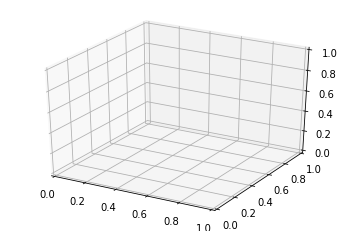

In [1]:

%matplotlib inline
%run ../../load_magic/storage.py
import numpy as np
import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

from mpl_toolkits import mplot3d
import os

fig = plt.figure()
ax = plt.axes(projection='3d')
#s = Storage()
#svg_dir = os.path.join(s.saves_folder, 'svg')
#file_name = 'blank.svg'
#file_path = os.path.join(svg_dir, file_name)
#fig.savefig(file_path, transparent=True)
#!"C:\Program Files\Inkscape\inkscape.exe" {os.path.abspath(file_path)}

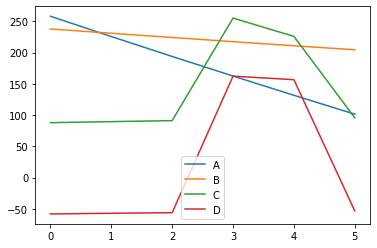

In [7]:

%matplotlib inline

rows_list = [{'A': '258.28141', 'B': '237.93957', 'C': '87.90891', 'D': '-58.11436'},
             {'A': '225.81116', 'B': '231.03808', 'C': '89.59639', 'D': '-57.12354'},
             {'A': '193.91324', 'B': '224.25823', 'C': '91.21417', 'D': '-56.15784'},
             {'A': '162.57266', 'B': '217.59684', 'C': '255.33769', 'D': '162.3804'},
             {'A': '131.77492', 'B': '211.05084', 'C': '226.02656', 'D': '156.7523'},
             {'A': '101.50606', 'B': '204.61724', 'C': '95.67653', 'D': '-53.40333'}]
df = pd.DataFrame(rows_list)
for cn in df.columns:
    df[cn] = df[cn].map(lambda x: float(x))
AxesSubplot_obj = df.plot.line()

In [8]:

from scipy.optimize import curve_fit
import numpy as np
import math

def fit_curve(get_list, given_list):
    
    def func(x, a, b):
        
        return a*x + b
    
    get_data = np.array(object=get_list)
    given_data = np.array(object=given_list)
    popt, pcov = curve_fit(func, given_data, get_data)
    line_2d_obj = plt.plot(given_data, get_data, 'b-', label='data')
    
    def predict_get(given_num):
        '''Get the number given the number'''

        return popt[0]*given_num + popt[1]

    label_str = 'fit: get_num = %5.1f * given_num + %5.1f' % tuple(popt)
    line_2d_obj = plt.plot(given_data, predict_get(given_data), 'r-', label=label_str)
    plt.xlabel('Given Number')
    plt.ylabel('Gotten Number')
    legend_obj = plt.legend()
    
    return popt, predict_get

In [13]:

df

,A,B,C,D
0,258.28141,237.93957,87.90891,-58.11436
1,225.81116,231.03808,89.59639,-57.12354
2,193.91324,224.25823,91.21417,-56.15784
3,162.57266,217.59684,255.33769,162.38040
4,131.77492,211.05084,226.02656,156.75230
5,101.50606,204.61724,95.67653,-53.40333


[0, 1, 2, 5]
fit: C = -20.246572547714607 * A + 2039.3204800242531
[-1252.2186749406876, -628.6699977250357] intead of [255.33769, 226.02656]


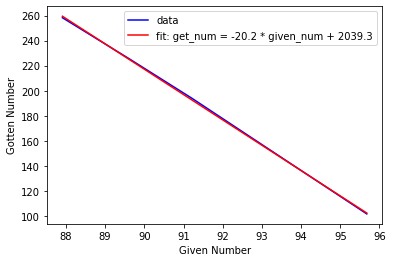

In [15]:

idx_list = list(range(3)) + [5]
mask_series = df.index.isin(idx_list)
good_a_list = df[mask_series].A.tolist()
good_c_list = df[mask_series].C.tolist()
popt, predict_get = fit_curve(good_a_list, good_c_list)
idx_list = [3, 4]
mask_series = df.index.isin(idx_list)
a_list = df[mask_series].A.tolist()
print('fit: C = {} * A + {}'.format(*popt))
c_list = [predict_get(a) for a in a_list]
print('{} intead of {}'.format(c_list, df[mask_series].C.tolist()))

fit: C = -4.303374277354286 * B + 616.4963732926979
[-319.90427079687834, -291.73438277731714] intead of [255.33769, 226.02656]


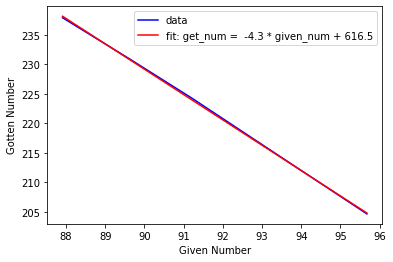

In [14]:

idx_list = list(range(3)) + [5]
mask_series = df.index.isin(idx_list)
popt, predict_get = fit_curve(df[mask_series].B, df[mask_series].C)
idx_list = [3, 4]
mask_series = df.index.isin(idx_list)
b_list = df[mask_series].B.tolist()
print('fit: C = {} * B + {}'.format(*popt))
c_list = [predict_get(b) for b in b_list]
print('{} intead of {}'.format(c_list, df[mask_series].C.tolist()))